In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing the Dependencies

In [92]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

Data Collection and Analysis

In [75]:
# loading the diabetes dataset to a pandas dataframe
diabetes_dataset = pd.read_csv('/content/drive/My Drive/SVM/diabetes.csv')

In [76]:
# print the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [77]:
# number of rows and columns in this dataset
diabetes_dataset.shape

(768, 9)

In [78]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [79]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0 - Non Diabetic

1 - Diabetic

In [80]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [81]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [82]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [83]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test Split

In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [85]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the Model

In [86]:
classifier = SVC(kernel='rbf', probability=True)

In [87]:
#training the Support Vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(probability=True)

Model Evaluation

In [88]:
# accuracy score on the training data
Y_train_pred = classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train_pred, Y_train)

In [89]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7638436482084691


In [94]:
# accuracy score on the test data
Y_pred = classifier.predict(X_test)
Y_prob = classifier.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class
test_data_accuracy = accuracy_score(Y_pred, Y_test)

In [95]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7857142857142857


In [96]:
# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.95      0.85       100
           1       0.84      0.48      0.61        54

    accuracy                           0.79       154
   macro avg       0.81      0.72      0.73       154
weighted avg       0.80      0.79      0.77       154

Confusion Matrix:
[[95  5]
 [28 26]]


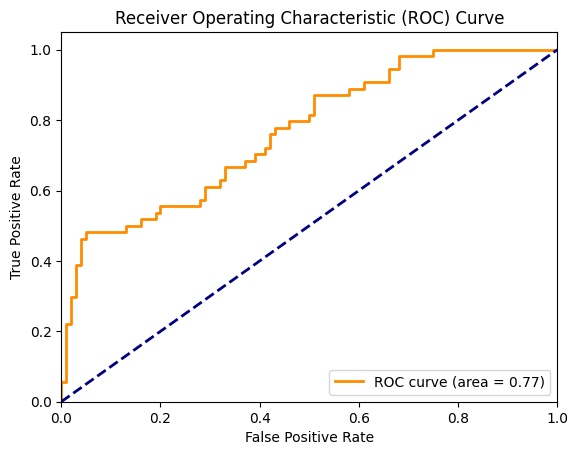

In [98]:
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(Y_test, Y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()